# Projet math info

## Premier programme (sans choix de la direction du gradient)

In [15]:
def find_seed(g, c = 0, eps = 2.0**(-26)):
    maxi = 1.0
    mini = 0.0
    if (c < g(0,0) and c < g(0,1)) or (c > g(0,0) and c > g(0,1)):
        return None
    else:
        while maxi - mini > eps:
            milieu = (mini + maxi)/2.0
            if (g(0,milieu) - c) * (g(0,maxi) - c) >= 0.0:
                maxi = milieu
            else :
                mini = milieu
        return (maxi + mini)/2.0

import autograd
from autograd import numpy as np
import matplotlib.pyplot as plt

def grad(f, x, y):
    g = autograd.grad
    return np.r_[g(f, 0)(x, y), g(f, 1)(x, y)]

def jacob(f, x, y):
    j = autograd.jacobian
    return np.c_[j(f, 0)(x, y), j(f, 1)(x, y)]
def newton(F,X0):
    """X0 doit être un array"""
    Xk=X0
    J = jacob(F, Xk[0], Xk[1])
    Jinv = np.linalg.inv(J)
    Fk = F(Xk[0], Xk[1])
    J2 = np.dot(Jinv, Fk)
    Xkp1 = Xk - J2
    while  np.linalg.norm(Xkp1 - Xk) > 10**(-4):
        Xk = Xkp1
        J = jacob(F, Xkp1[0], Xkp1[1])
        Jinv = np.linalg.inv(J)
        Fk = F(Xkp1[0], Xkp1[1])
        J2 = np.dot(Jinv, Fk)
        Xkp1 = Xkp1 - J2
        
    return Xkp1




def simple_contour (f, c = 0.0, delta = 0.01):
    t = find_seed(f, c, eps = 2.0**(-26))
    if t == None:
        return [],[]
    lsx = [0.0]
    lsy = [t]
    x0 = lsx[-1]
    y0 = lsy[-1]
    def F(x,y):
            return np.r_[f(x, y) - c, (x-x0)**2 + (y-y0)**2 - delta**2]
    while lsx[-1] >= 0.0 and lsx[-1] <= 1.0 and lsy[-1] >= 0.0 and lsy[-1] <= 1.0:
        x0 = lsx[-1]
        y0 = lsy[-1]
        X0 = np.r_[x0, y0]
        gradient = grad(f, x0, y0)
        coeffdir = np.r_[-gradient[1], gradient[0]]
        Xk = X0 + delta / np.linalg.norm(coeffdir) * coeffdir
        Xkp1 = newton(F,Xk)
        lsx += [Xkp1[0]]
        lsy += [Xkp1[1]]
    return lsx, lsy

## arc de cercle

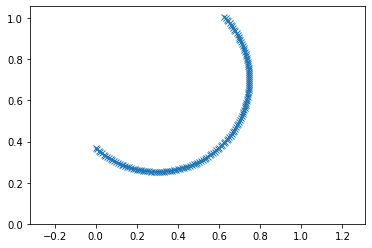

In [16]:
def f(x,y):
    return ((x-0.3)**2 + (y-0.7)**2)/2
def g(x,y):
    return ((x-0.3)**2 + (y-0.7)**2)/2


a=simple_contour(f,0.1)
plt.plot(a[0],a[1], marker='x')

gnp=np.vectorize(g)

X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = gnp(X, Y)
plt.axis('equal')
plt.contour(X, Y, Z, [0.1])

plt.axis('equal')
plt.show()

#les croix correspondent au contour tracé par la fonction simple_contour
#le trait plein correspond au contour tracé par la fonction contour de la bibliothèque numpy

## avec le gradient dans l'autre sens

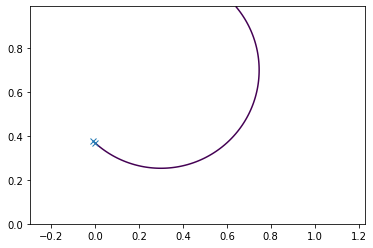

In [17]:
def f(x,y):
    return -((x-0.3)**2 + (y-0.7)**2)/2
def g(x,y):
    return -((x-0.3)**2 + (y-0.7)**2)/2

plt.clf()
a=simple_contour(f,-0.1)
plt.plot(a[0],a[1], marker='x')
gnp=np.vectorize(g)
X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = gnp(X, Y)
plt.axis('equal')
plt.contour(X, Y, Z, [-0.1])
plt.show()

#les croix correspondent au contour tracé par la fonction simple_contour
#le trait plein correspond au contour tracé par la fonction contour de la bibliothèque numpy

## Deuxième programme (avec choix de la direction du gradient)

In [18]:
def sens_grad(gradx, grady):
    if gradx>0:
            if grady>0:
                return -1
            return 1
    elif grady>0:
        return -1
    return 1


def simple_contour2 (f, c = 0.0, delta = 0.01):
    t = find_seed(f, c, eps = 2.0**(-26))
    if t == None:
        return [],[]
    lsx = [0.0]
    lsy = [t]
    x0 = lsx[-1]
    y0 = lsy[-1]
    gradient = grad(f, x0, y0)
    a=sens_grad(gradient[0],gradient[1])
    def F(x,y):
            return np.r_[f(x, y) - c, (x-x0)**2 + (y-y0)**2 - delta**2]
    a=sens_grad(gradient[0],gradient[1])
    while lsx[-1] >= 0.0 and lsx[-1] <= 1.0 and lsy[-1] >= 0.0 and lsy[-1] <= 1.0:
        x0 = lsx[-1]
        y0 = lsy[-1]
        X0 = np.r_[x0, y0]
        gradient = grad(f, x0, y0)
        coeffdir = np.r_[-a*gradient[1], a*gradient[0]]
        Xk = X0 + delta / np.linalg.norm(coeffdir) * coeffdir
        Xkp1 = newton(F,Xk)
        lsx += [Xkp1[0]]
        lsy += [Xkp1[1]]
    return lsx, lsy


### arc de cercle

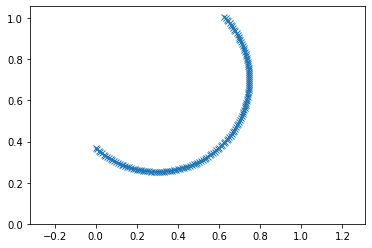

In [19]:
def f(x,y):
    return ((x-0.3)**2 + (y-0.7)**2)/2
def g(x,y):
    return ((x-0.3)**2 + (y-0.7)**2)/2


a=simple_contour2(f,0.1)
plt.plot(a[0],a[1], marker='x')

gnp=np.vectorize(g)

X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = gnp(X, Y)
plt.axis('equal')
plt.contour(X, Y, Z, [0.1])

plt.axis('equal')
plt.show()

#les croix correspondent au contour tracé par la fonction simple_contour2
#le trait plein correspond au contour tracé par la fonction contour de la bibliothèque numpy

### Avec le gradient dans l'autre sens

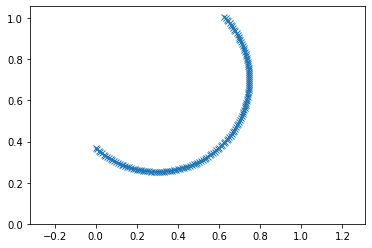

In [20]:
def f(x,y):
    return -((x-0.3)**2 + (y-0.7)**2)/2
def g(x,y):
    return -((x-0.3)**2 + (y-0.7)**2)/2

plt.clf()
a=simple_contour2(f,-0.1)
plt.plot(a[0],a[1], marker='x')
gnp=np.vectorize(g)
X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = gnp(X, Y)
plt.axis('equal')
plt.contour(X, Y, Z, [-0.1])
plt.show()

#les croix correspondent au contour tracé par la fonction simple_contour2
#le trait plein correspond au contour tracé par la fonction contour de la bibliothèque numpy

# Contour complexe 

In [21]:
#La fonction suivante a été écrite par M. Sébastien Boisgérault https://github.com/boisgera

In [22]:

# Rotators
# ------------------------------------------------------------------------------
LEFT, UP, RIGHT, DOWN = 0, 1, 2, 3  # clockwise


def rotate_direction(direction, n=1):
    return (direction + n) % 4


def rotate(x, y, n=1):
    if n == 0:
        return x, y
    elif n >= 1:
        return rotate(1 - y, x, n - 1)
    else:
        assert n < 0
        return rotate(x, y, n=-3 * n)


def rotate_function(f, n=1):
    def rotated_function(x, y):
        xr, yr = rotate(x, y, -n)
        return f(xr, yr)

    return rotated_function


# Complex Contouring
# ------------------------------------------------------------------------------

# Customize the simple_contour function used in contour :
# simple_contour = smart_simple_contour


def contour1(f, c, xs=[0.0, 1.0], ys=[0.0, 1.0], delta=0.01):
    curves = []
    nx, ny = len(xs), len(ys)
    for i in range(nx - 1):
        for j in range(ny - 1):
            xmin, xmax = xs[i], xs[i + 1]
            ymin, ymax = ys[j], ys[j + 1]

            def f_cell(x, y):
                return f(xmin + (xmax - xmin) * x, ymin + (ymax - ymin) * y)

            done = set()
            for n in [0, 1, 2, 3]:
                if n not in done:
                    rotated_f_cell = rotate_function(f_cell, n)
                    x_curve_r, y_curve_r = simple_contour(rotated_f_cell, c, delta)
                    exit = None
                    if len(x_curve_r) >= 1:
                        xf, yf = x_curve_r[-1], y_curve_r[-1]
                        if xf == 0.0:
                            exit = LEFT
                        elif xf == 1.0:
                            exit = RIGHT
                        elif yf == 0.0:
                            exit = DOWN
                        elif yf == 1.0:
                            exit = UP
                    if exit is not None:  # a fully successful contour fragment
                        exit = rotate_direction(exit, n)
                        done.add(exit)

                    x_curve, y_curve = [], []
                    for x_r, y_r in zip(x_curve_r, y_curve_r):
                        x, y = rotate(x_r, y_r, n=-n)
                        x_curve.append(x)
                        y_curve.append(y)
                    x_curve = np.array(x_curve)
                    y_curve = np.array(y_curve)
                    curves.append(
                        (xmin + (xmax - xmin) * x_curve, ymin + (ymax - ymin) * y_curve)
                    )
    return curves

In [ ]:
"""Tu fais bien d’en parler, c’est un poil plus compliqué que ça et je viens de me rendre compte que les valeurs renvoyées 
ne sont pas conformes à la documentation que j’ai fournie dans le document « Calcul Différentiel II »

Si

level_curves = contour1(f, c, xs, ys) 
alors level_curves est une liste de paires (x, y) qui représentent un fragment de ligne 
de niveau (x et y sont des tableaux mono-dimensionnels). 
Autrement, dit, tu peux tracer l’ensemble des fragments avec :

for x, y in level_curves:
    matplotlib.pyplot.plot(x, y)"""